In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
#menghubungkan ke gdrive
drive.mount('/content/drive')
file = '/content/drive/My Drive/Colab Notebooks/Data_Demo_Auto_6(1).csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Memilih kolom dataset yang digunakan untuk data input

In [ ]:
#membaca file dataset
df=pd.read_csv(file)
df.head()

,order_id,pay_method,order_hour_of_day,arrival_ timestamp,pickup_timestamp,start_service_time,finish_service_time,days_since_prior_order,air fresheners candles,asian foods,...,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,time_pickup,time_service,Total_Price,total_barang
0,930878,2,0,00:00:22,00:07:10,00:07:10,00:09:43,17,0,0,...,0,0,0,0,0,0,00:06:48,00:02:33,38.78,7
1,1494544,2,0,00:02:45,00:07:41,00:07:41,00:10:25,11,0,0,...,0,0,0,0,0,0,00:04:56,00:02:44,16.92,4
2,3275833,1,0,00:03:17,00:23:22,00:23:22,00:26:11,3,0,0,...,0,0,0,0,0,1,00:20:05,00:02:49,198.23,24
3,57650,2,0,00:03:33,00:16:29,00:16:29,00:22:11,3,0,0,...,0,0,0,1,0,0,00:12:56,00:05:42,74.19,16
4,2002409,1,0,00:03:59,00:19:11,00:19:11,00:24:25,10,0,0,...,0,0,0,0,0,1,00:15:12,00:05:14,104.66,18


In [ ]:
kolomdrop=['order_id','arrival_ timestamp','pickup_timestamp','start_service_time','finish_service_time']
df.drop(kolomdrop,axis=1,inplace=True) #menghapus kolom 

In [ ]:
dropproduk=df.iloc[:,3:-4]

In [ ]:
dropproduk.head()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#menghapus kolom
df.drop(dropproduk,axis=1,inplace=True) 

In [ ]:
df.head()

,pay_method,order_hour_of_day,days_since_prior_order,time_pickup,time_service,Total_Price,total_barang
0,2,0,17,00:06:48,00:02:33,38.78,7
1,2,0,11,00:04:56,00:02:44,16.92,4
2,1,0,3,00:20:05,00:02:49,198.23,24
3,2,0,3,00:12:56,00:05:42,74.19,16
4,1,0,10,00:15:12,00:05:14,104.66,18


In [ ]:
#melakukan pengecekan type data tiap kolom
df.dtypes

pay_method                  int64
order_hour_of_day           int64
days_since_prior_order      int64
time_pickup                object
time_service               object
Total_Price               float64
total_barang                int64
dtype: object

In [ ]:
#melakukan import libaray
from datetime import datetime
import time

In [ ]:
#mengubah lama waktu pick dan lama service ke dalam bentuk seconds/detik
df['time_pickup_sec']= pd.to_timedelta(df['time_pickup']).dt.total_seconds()
df['time_service_sec']= pd.to_timedelta(df['time_service']).dt.total_seconds()

In [ ]:
df.head()

,pay_method,order_hour_of_day,days_since_prior_order,time_pickup,time_service,Total_Price,total_barang,time_pickup_sec,time_service_sec
0,2,0,17,00:06:48,00:02:33,38.78,7,408.0,153.0
1,2,0,11,00:04:56,00:02:44,16.92,4,296.0,164.0
2,1,0,3,00:20:05,00:02:49,198.23,24,1205.0,169.0
3,2,0,3,00:12:56,00:05:42,74.19,16,776.0,342.0
4,1,0,10,00:15:12,00:05:14,104.66,18,912.0,314.0


In [ ]:
#mengubah kolom time_pickup_sec dan time_service_sec kedalam bentuk integer
df['time_pickup_sec'] = df['time_pickup_sec'].astype(int)
df['time_service_sec'] = df['time_service_sec'].astype(int)

In [ ]:
df.dtypes

pay_method                  int64
order_hour_of_day           int64
days_since_prior_order      int64
time_pickup                object
time_service               object
Total_Price               float64
total_barang                int64
time_pickup_sec             int64
time_service_sec            int64
dtype: object

In [ ]:
#menghapus kolom
df.drop(df[['time_pickup','time_service']], axis=1 ,inplace=True)

In [ ]:
df.head()

,pay_method,order_hour_of_day,days_since_prior_order,Total_Price,total_barang,time_pickup_sec,time_service_sec
0,2,0,17,38.78,7,408,153
1,2,0,11,16.92,4,296,164
2,1,0,3,198.23,24,1205,169
3,2,0,3,74.19,16,776,342
4,1,0,10,104.66,18,912,314


In [ ]:
#menyimpan dataframe ke bentuk csv
df.to_csv('/content/drive/My Drive/Colab Notebooks/prediction_Data_Auto_6.csv', index=False, header=True)

# Prediksi total barang yang akan dibeli konsumen menggunkan Bidirectional LSTM

# Preprocessing Data

Menggunakan data input multivariat time series dari kolom 'pay_method', 'order_hour_of_day', 'days_since_prior_order','Total_Price', 'total_barang', 'time_pickup_sec', 'time_service_sec'.
dan label menggunakan kolom 'total_barang'

Pada kasus ini akan memprediksi 20 data ke depan untuk total_barang.

---


Dan window atau time step sebesar 25.

In [ ]:
#membaca file yang sudah disimpan
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/prediction_Data_Auto_6.csv')

In [ ]:
df.columns

Index(['pay_method', 'order_hour_of_day', 'days_since_prior_order',
       'Total_Price', 'total_barang', 'time_pickup_sec', 'time_service_sec'],
      dtype='object')

In [ ]:
validate = df[['pay_method', 'order_hour_of_day', 'days_since_prior_order',
       'Total_Price', 'total_barang', 'time_pickup_sec', 'time_service_sec']].tail(20)
df.drop(df.tail(20).index, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#melakukan proses normalisasi data

X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(df[['pay_method', 'order_hour_of_day', 'days_since_prior_order',
       'Total_Price', 'total_barang', 'time_pickup_sec', 'time_service_sec']])
Y_data = Y_scaler.fit_transform(df[['total_barang']]) 

In [ ]:
def custom_trainsplit(dataset, target, mulai, akhir, window, horizon):
     X = []
     y = []
     mulai = mulai + window
     if akhir is None:
         akhir = len(dataset) - horizon
     for i in range(mulai, akhir):
         index = range(i-window, i)  #menentukan index untuk dataset
         X.append(dataset[index])         #menyimpan nilai dari dataset sesuai index ke dalam list X 
         idx = range(i+1, i+1+horizon)   #menentukan index untuk target
         y.append(target[idx])  #menyimpan nilai dari target sesuai index ke dalam list y
     return np.array(X), np.array(y) 

In [ ]:
hist_window = 25  #menentukan time steps
horizon = 20     #menentukan banyak data yang akan diprediksi kedepannya
TRAIN_SPLITING = 4000
x_train, y_train = custom_trainsplit(X_data, Y_data, 0, TRAIN_SPLITING, hist_window, horizon)  #melakukan spliting data x_train dan y_train
x_vali, y_vali = custom_trainsplit(X_data, Y_data, TRAIN_SPLITING, None, hist_window, horizon) #melakukan spliting data x_val dan y_val

In [ ]:
x_train[0]

array([[0.5       , 0.        , 0.56666667, 0.04661718, 0.0952381 ,
        0.00469945, 0.04496124],
       [0.5       , 0.        , 0.36666667, 0.01943522, 0.04761905,
        0.00340305, 0.0620155 ],
       [0.        , 0.        , 0.1       , 0.24488629, 0.36507937,
        0.01392474, 0.06976744],
       [0.5       , 0.        , 0.1       , 0.09064797, 0.23809524,
        0.00895906, 0.3379845 ],
       [0.        , 0.        , 0.33333333, 0.12853608, 0.26984127,
        0.01053326, 0.29457364],
       [0.5       , 0.        , 1.        , 0.05667674, 0.06349206,
        0.00395865, 0.40465116],
       [1.        , 0.        , 0.86666667, 0.22246677, 0.46031746,
        0.01692267, 0.26356589],
       [0.        , 0.        , 1.        , 0.17663297, 0.38095238,
        0.01482759, 0.1379845 ],
       [0.5       , 0.        , 1.        , 0.13459171, 0.25396825,
        0.00863496, 0.40775194],
       [1.        , 0.        , 0.23333333, 0.08491563, 0.12698413,
        0.00577593, 0.4

In [ ]:
import tensorflow as tf 
batch_size = 16
buffer_size = 100
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train)) #menyimpan ke dalamm bentuk list 
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat() #melakukan suffle pada data dan mengubah bentuk tensor
val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))      #menyimpan ke dalamm bentuk list 
val_data = val_data.batch(batch_size).repeat()  #untuk mengubah bentuk tensor setelah mengaplikasikan .batch

# Melakukan training dengan model pertama

In [ ]:
#melakukan import library keras dan paket nya
import tensorflow as tf
modelauto = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True), 
                               input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(80)),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(units=horizon),
])

#melakukan compile
modelauto.compile(optimizer='adam', loss='mse')

In [ ]:
#menampilkan ringkasan model
modelauto.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 25, 200)          86400     
 l)                                                              
                                                                 
 dense (Dense)               (None, 25, 10)            2010      
                                                                 
 bidirectional_1 (Bidirectio  (None, 160)              58240     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 10)                1610      
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0

In [ ]:
#membuat path model untuk disimpan di langkah berikutnya
model_path='/content/drive/My Drive/Colab Notebooks/model_prediction_total_barang_1.h5'

#membuat variabel pengaturan early_stopings, checkpoint
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='min')       #patience=20 -> training akan diberhentikan saat saat val loss memburuk dari epoch 20 sampai epoch selanjutnya
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0) #save_best_only=True -> menyimpan model terbaik, val loss yg teredah
callbacks=[early_stopings,checkpoint] 

In [ ]:
#melakukan training
history = modelauto.fit(train_data, epochs=100, steps_per_epoch=50,validation_data=val_data,validation_steps=10,verbose=1,callbacks=callbacks)

Epoch 1/100
50/50 [==============================] - 50s 335ms/step - loss: 0.0305 - val_loss: 0.0155
Epoch 2/100
50/50 [==============================] - 6s 125ms/step - loss: 0.0195 - val_loss: 0.0128
Epoch 3/100
50/50 [==============================] - 6s 119ms/step - loss: 0.0191 - val_loss: 0.0122
Epoch 4/100
50/50 [==============================] - 3s 63ms/step - loss: 0.0158 - val_loss: 0.0123
Epoch 5/100
50/50 [==============================] - 3s 63ms/step - loss: 0.0174 - val_loss: 0.0123
Epoch 6/100
50/50 [==============================] - 3s 69ms/step - loss: 0.0187 - val_loss: 0.0121
Epoch 7/100
50/50 [==============================] - 3s 65ms/step - loss: 0.0167 - val_loss: 0.0120
Epoch 8/100
50/50 [==============================] - 3s 64ms/step - loss: 0.0179 - val_loss: 0.0125
Epoch 9/100
50/50 [==============================] - 3s 62ms/step - loss: 0.0154 - val_loss: 0.0123
Epoch 10/100
50/50 [==============================] - 3s 66ms/step - loss: 0.0169 - val_loss: 0.

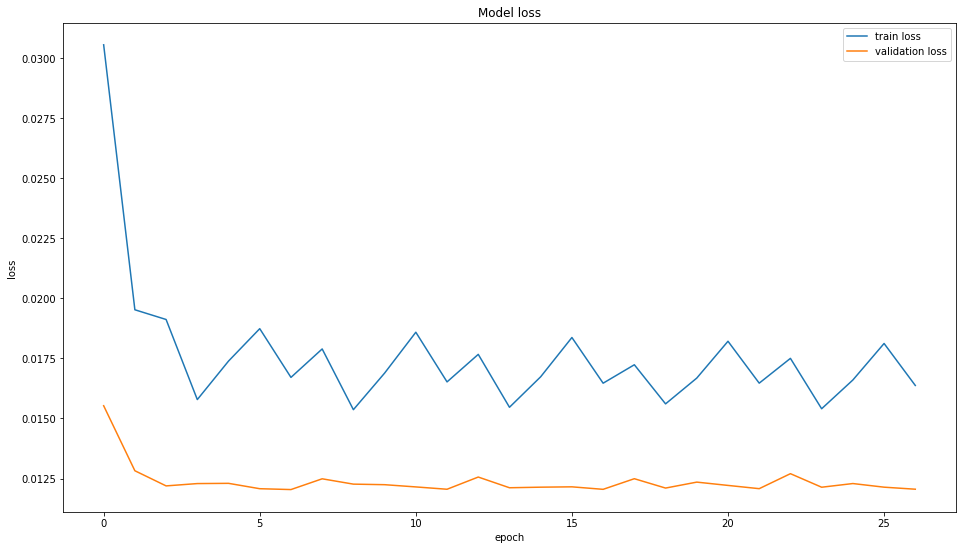

In [ ]:
import matplotlib.pyplot as plt

#Menampilkan nilai loss train dan loss val
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show() 

In [ ]:
#menentukan data yang akan digunakan untuk prediksi
data_val = X_scaler.fit_transform(df[['pay_method', 'order_hour_of_day', 'days_since_prior_order',
          'Total_Price', 'total_barang', 'time_pickup_sec', 'time_service_sec']].tail(25))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])
prediksi = modelauto.predict(val_rescaled)

#melakukan prediksi
prediksi_inverse = Y_scaler.inverse_transform(prediksi)
prediksi_inverse 

array([[ 9.797133 , 10.664812 , 10.320782 ,  9.991338 , 10.017498 ,
        10.8159275,  9.894532 , 10.145718 , 10.665215 , 10.2985525,
         9.58109  ,  9.9531355, 10.020171 ,  9.797909 , 10.132796 ,
         9.4811125,  9.974087 ,  9.55643  , 10.681903 , 10.278673 ]],
      dtype=float32)

In [ ]:
from sklearn import metrics

#Melakukan evaluasi performa
print(f"MSE: {metrics.mean_squared_error(validate['total_barang'], prediksi_inverse[0])}") #MSE
print(f"MAE: {metrics.mean_absolute_error(validate['total_barang'], prediksi_inverse[0])}") #MAE
print(f"MAPE: {metrics.mean_absolute_percentage_error(validate['total_barang'], prediksi_inverse[0])}")  #MAPE
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(validate['total_barang'], prediksi_inverse[0]))}")  #RMSE


MSE: 71.57074209535381
MAE: 7.180915880203247
MAPE: 1.42930053552312
RMSE: 8.459949296263767


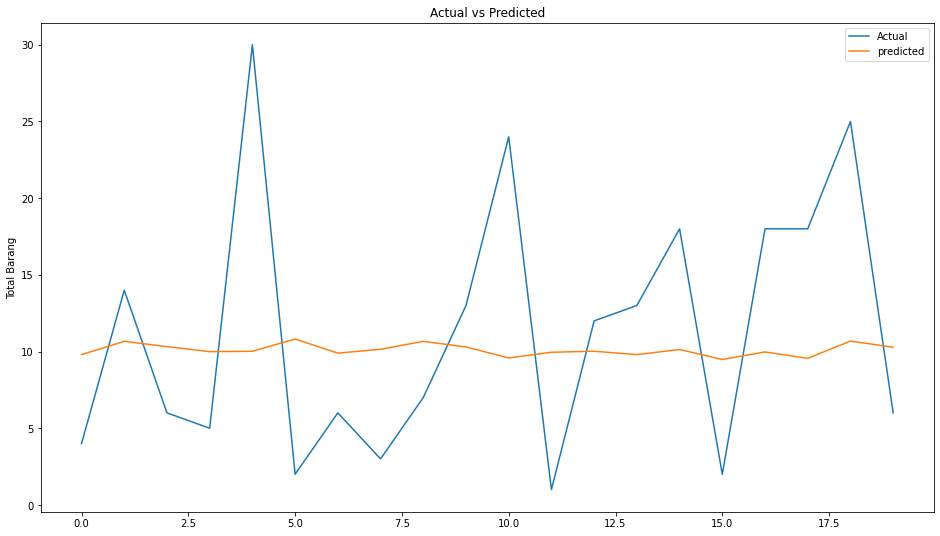

In [ ]:
#Menampilkan grafik nilai total barang dari nilai sebenarnya dan dari prediksi
plt.figure(figsize=(16,9))
plt.plot( list(validate['total_barang']))
plt.plot( list(prediksi_inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Total Barang")
plt.legend(('Actual','predicted'))
plt.show()

# Melakukan training dengan model kedua

In [ ]:
#melakukan import library keras dan paket nya
import tensorflow as tf
modelauto = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True), 
                               input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(120)),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(units=horizon),
])

#melakukan compile
modelauto.compile(optimizer='adam', loss='mse')

In [ ]:
#menampilkan ringkasan model
modelauto.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 25, 300)          189600    
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 25, 10)            3010      
                                                                 
 bidirectional_7 (Bidirectio  (None, 240)              125760    
 nal)                                                            
                                                                 
 dense_13 (Dense)            (None, 10)                2410      
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dropout_3 (Dropout)         (None, 10)               

In [ ]:
#membuat path model untuk disimpan di langkah berikutnya
model_path='/content/drive/My Drive/Colab Notebooks/model_prediction_total_barang_2.h5'

#membuat variabel pengaturan early_stopings, checkpoint
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='min') #patience=20 -> training akan diberhentikan saat saat val loss memburuk dari epoch 20 sampai epoch selanjutnya
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0) #save_best_only=True -> menyimpan model terbaik, val loss yg teredah
callbacks=[early_stopings,checkpoint] 

In [ ]:
#melakukan training
history = modelauto.fit(train_data, epochs=100, steps_per_epoch=50,validation_data=val_data,validation_steps=10,verbose=1,callbacks=callbacks)

Epoch 1/100
50/50 [==============================] - 21s 159ms/step - loss: 0.0292 - val_loss: 0.0147
Epoch 2/100
50/50 [==============================] - 6s 110ms/step - loss: 0.0192 - val_loss: 0.0126
Epoch 3/100
50/50 [==============================] - 5s 110ms/step - loss: 0.0191 - val_loss: 0.0124
Epoch 4/100
50/50 [==============================] - 5s 108ms/step - loss: 0.0161 - val_loss: 0.0120
Epoch 5/100
50/50 [==============================] - 5s 104ms/step - loss: 0.0174 - val_loss: 0.0123
Epoch 6/100
50/50 [==============================] - 5s 105ms/step - loss: 0.0189 - val_loss: 0.0121
Epoch 7/100
50/50 [==============================] - 6s 126ms/step - loss: 0.0166 - val_loss: 0.0121
Epoch 8/100
50/50 [==============================] - 5s 105ms/step - loss: 0.0180 - val_loss: 0.0125
Epoch 9/100
50/50 [==============================] - 5s 107ms/step - loss: 0.0152 - val_loss: 0.0122
Epoch 10/100
50/50 [==============================] - 5s 106ms/step - loss: 0.0167 - val_l

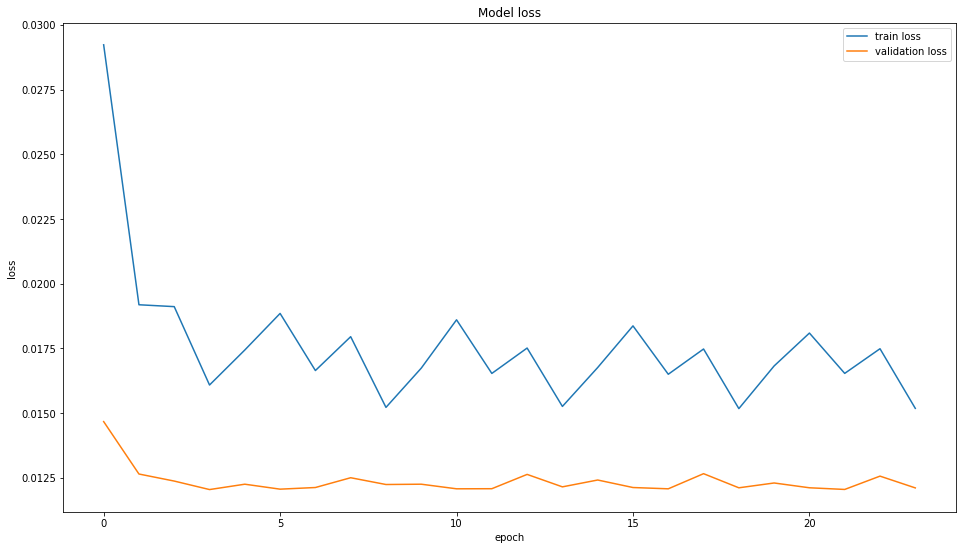

In [ ]:
import matplotlib.pyplot as plt

#Menampilkan nilai loss train dan loss val
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show() 

In [ ]:
#menentukan data yang akan digunakan untuk prediksi
data_val = X_scaler.fit_transform(df[['pay_method', 'order_hour_of_day', 'days_since_prior_order',
          'Total_Price', 'total_barang', 'time_pickup_sec', 'time_service_sec']].tail(25))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

#melakukan prediksi
prediksi = modelauto.predict(val_rescaled)
prediksi_inverse = Y_scaler.inverse_transform(prediksi)  
prediksi_inverse 

array([[11.139088, 10.340776, 10.91185 , 10.068995,  9.871405,  9.990522,
         9.769741, 10.970051,  9.673044,  9.731013, 10.376403,  9.812458,
        11.24547 , 10.519319,  9.755754, 10.388822, 10.103886,  9.619702,
        10.614121, 10.430558]], dtype=float32)

In [ ]:
from sklearn import metrics

#melakukan evaluasi performa
print(f"MSE: {metrics.mean_squared_error(validate['total_barang'], prediksi_inverse[0])}")  #MSE
print(f"MAE: {metrics.mean_absolute_error(validate['total_barang'], prediksi_inverse[0])}")  #MAE
print(f"MAPE: {metrics.mean_absolute_percentage_error(validate['total_barang'], prediksi_inverse[0])}")  #MAPE
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(validate['total_barang'], prediksi_inverse[0]))}")     #RMSE


MSE: 72.31182767807695
MAE: 7.198863983154297
MAPE: 1.4483718019378928
RMSE: 8.50363614450177


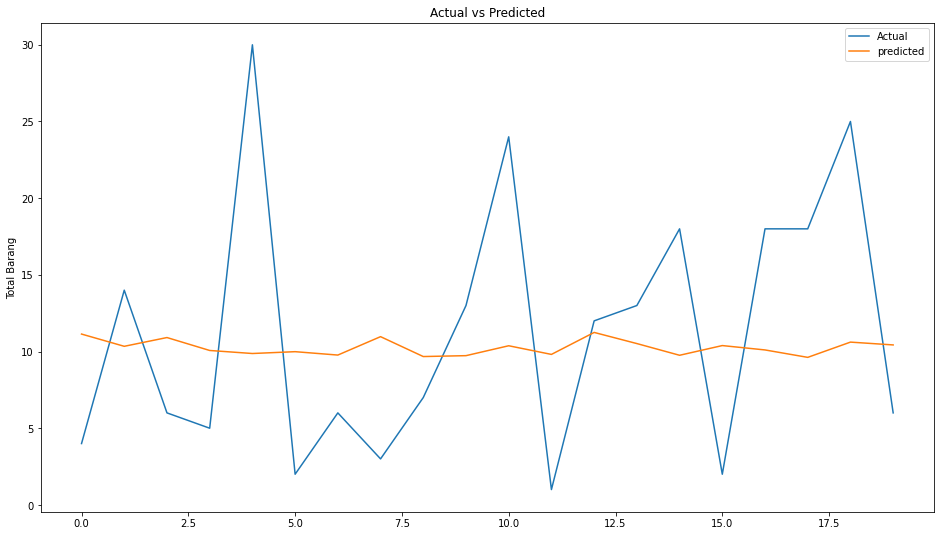

In [ ]:
#Menampilkan nilai total barang dari nilai sebenarnya dan dari prediksi
plt.figure(figsize=(16,9))
plt.plot( list(validate['total_barang']))
plt.plot( list(prediksi_inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Total Barang")
plt.legend(('Actual','predicted'))
plt.show()